In [1]:
import os
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from arch import arch_model

In [2]:
ini_work_dir = os.getcwd()
os.chdir('..')

In [3]:
from local_models import calculate_retraining_garch_forecasts

In [4]:
with open('config.json') as file:
    config = json.load(file)

In [5]:
files_folder = config['files_folders']['processed']
research_results_folder = config['files_folders']['research_results']
antecedent_params_folder = config['files_folders']['antecedent_params_sets']
metadata_file_name = 'current_antecedent_fitting_metadata_seasonal.pkl'
logs_folder = config['files_folders']['logs']
summary_table_name = 'summary_table_seas'

In [6]:
pd.options.display.max_colwidth = 300
pd.options.display.precision = 15

# Reading results files

## Seasonal

In [25]:
_files = ['apf_seas_nb_0_imoex_2015-01-05_1260_252_504_M=[1,_20]_at_2022-10-19_11-22-07.290056.pkl']
res_big = [pd.read_pickle(f'{research_results_folder}/{_file}') for _file in _files]
_res = [_elem for res_piece in res_big for _elem in res_piece['result']].copy()

res = pd.DataFrame.from_records(_res).copy()

In [26]:
if (res['status'] != 0).any():
    raise Error('Not all models were fitted')

In [27]:
res.shape

(2592, 8)

In [28]:
res.sort_values('rmse', ascending=False)

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
367,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, -0.035, 0.035, 0.06), 'variances': (0.06, 0.06, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac144d30a60>,0.000000070902831,0.000266275854917,1.036717202314047,None,None
162,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, 0.015, 0.06), 'variances': (0.04, 0.04, 0.06, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1432f3070>,0.000000070900536,0.000266271544885,1.036617292836056,None,None
484,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.015, 0.035, 0.04), 'variances': (0.04, 0.06, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac14590d400>,0.000000070861566,0.000266198359166,1.035007031355274,None,None
216,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, 0.035, 0.06), 'variances': (0.06, 0.04, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac143970490>,0.000000070844853,0.000266166965418,1.034310178189787,None,None
1052,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, 0.005000000000000001, 0.015, 0.02), 'variances': (0.06, 0.06, 0.04, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1479cb1c0>,0.000000070833127,0.000266144936083,1.033821854182782,None,None
...,...,...,...,...,...,...,...,...
619,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, 0.005000000000000001, 0.015, 0.02), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac14626b460>,0.000000070431407,0.000265389160675,1.021863854330176,None,None
27,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, -0.015, 0.015, 0.06), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac13f22b550>,0.000000070431407,0.000265389160649,1.021863919986858,None,None
443,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.015, 0.015, 0.04), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1457bd9d0>,0.000000070431407,0.000265389160563,1.021864138764117,None,None
1101,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, 0.005000000000000001, 0.035, 0.02), 'variances': (0.06, 0.06, 0.04, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac147c12190>,0.000000070431407,0.000265389160544,1.021864185118641,None,None


In [29]:
res[res['rmse'] == res['rmse'].min()]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
1006,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, -0.005000000000000001, 0.02), 'variances': (0.06, 0.06, 0.06, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2ac1477a5790>,0.000000070431407,0.000265389160481,1.021864348577805,None,None


In [16]:
fitted_ap = res[res['rmse'] == res['rmse'].min()].iloc[0]['antecedent_params'].copy()
fitted_ap

[{'a': [1.0, 1.0],
  'b': [5.0, 1.0],
  'c': [5.0, 1.0],
  'd': [5.0, 5.0],
  'n_clusters': 2},
 {'centers': (-0.05499999999999999, -0.015, 0.015, 0.06),
  'variances': (0.06, 0.04, 0.06, 0.06),
  'n_clusters': 4}]

In [17]:
res['rmse'].value_counts()

0.000872074963722    29
0.000872074963722    27
0.000872074963722    22
0.000872074963722    22
0.000872074963722    21
                     ..
0.000872074973568     1
0.000872074964090     1
0.000872074963907     1
0.000872074970614     1
0.000872074966459     1
Name: rmse, Length: 1755, dtype: int64

In [18]:
eps = 1e-5
res[(res['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback


<AxesSubplot:>

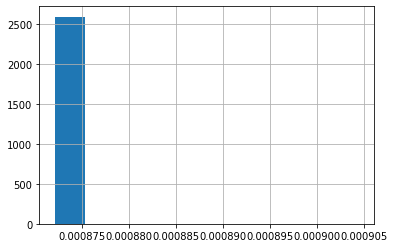

In [19]:
res['rmse'].hist(grid=True)

## W/o seasonality

In [64]:
_files = ['fitting_consequent_params_wo_seas_raw_result_nb_0_2022-09-25 00-09-43.615320.pkl']
res_big_wos = [pd.read_pickle(f'{research_results_folder}/{_file}') for _file in _files]
_res = [_elem for res_piece in res_big for _elem in res_piece['result']].copy()

res_wos = pd.DataFrame.from_records(_res).copy()

In [65]:
if (res_wos['status'] != 0).any():
    raise Error('Not all models were fitted')

In [66]:
res_wos.sort_values('rmse')

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
459,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.015, 0.015, 0.06), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25e9316e80>,0.000000760514742,0.000872074963697,1.122054045992051,None,None
875,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, 0.015, 0.04), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25ea618c40>,0.000000760514742,0.000872074963698,1.122054057358615,None,None
75,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, -0.015, 0.035, 0.06), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25e8225910>,0.000000760514742,0.000872074963698,1.122054113472667,None,None
955,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, 0.035, 0.02), 'variances': (0.06, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25ea9c2550>,0.000000760514742,0.000872074963699,1.122054080492022,None,None
974,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, -0.005000000000000001, 0.04), 'variances': (0.06, 0.06, 0.06, 0.04), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25eaaa0340>,0.000000760514742,0.000872074963699,1.122054075139307,None,None
...,...,...,...,...,...,...,...,...
957,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.095, -0.015, 0.035, 0.02), 'variances': (0.06, 0.06, 0.04, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25ea9d93d0>,0.000000760528653,0.000872082939196,1.121101086843143,None,None
231,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, 0.035, 0.02), 'variances': (0.04, 0.06, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25e88d5190>,0.000000760530184,0.000872083816815,1.120986934030317,None,None
273,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.075, 0.005000000000000001, -0.005000000000000001, 0.02), 'variances': (0.04, 0.04, 0.04, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25e8ab7e80>,0.000000760544188,0.000872091846057,1.120711177393733,None,None
755,"[{'a': [1.0, 1.0], 'b': [5.0, 1.0], 'c': [5.0, 1.0], 'd': [5.0, 5.0], 'n_clusters': 2}, {'centers': (-0.05499999999999999, -0.035, 0.015, 0.02), 'variances': (0.04, 0.04, 0.06, 0.06), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x2b25ea0a24c0>,0.000000770067605,0.000877534959491,1.103318065760372,None,None


In [67]:
fitted_ap_wos = res_wos[res_wos['rmse'] == res_wos['rmse'].min()].iloc[0]['antecedent_params'].copy()
fitted_ap_wos

[{'a': [1.0, 1.0],
  'b': [5.0, 1.0],
  'c': [5.0, 1.0],
  'd': [5.0, 5.0],
  'n_clusters': 2},
 {'centers': (-0.05499999999999999, -0.015, 0.015, 0.06),
  'variances': (0.06, 0.04, 0.06, 0.06),
  'n_clusters': 4}]

In [68]:
eps = 1e-5
res_wos[(res_wos['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback


<AxesSubplot:>

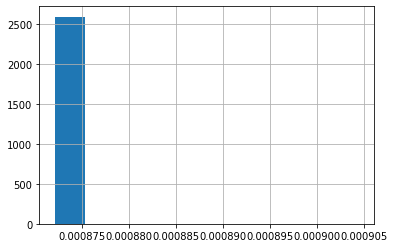

In [69]:
res_wos['rmse'].hist(grid=True)

# Tested

## Seasonal

In [34]:
test = res_big[0]['test'].copy()

In [35]:
tested_seas = pd.read_pickle(f'{research_results_folder}/tested_model_seasonal_2022-10-06 00-47-45.375958.pkl')

In [38]:
rmse = mean_squared_error(tested_seas.hist_output, test ** 2, squared=False)
mape = mean_absolute_percentage_error(tested_seas.hist_output, test ** 2)

In [41]:
rmse

0.0022831032042130181728

In [42]:
mape

1.4291477459829316049

## W/o seasonality

In [34]:
test = res_big[0]['test'].copy()

In [70]:
tested_wos = pd.read_pickle(f'{research_results_folder}/tested_model_wo_seas_2022-10-01 07-33-25.654524.pkl')

In [71]:
rmse = mean_squared_error(tested_wos.hist_output, test ** 2, squared=False)
mape = mean_absolute_percentage_error(tested_wos.hist_output, test ** 2)

In [72]:
rmse

0.0018650939484299551797

In [73]:
mape

1.3087021871618926261

# Vanilla GARCH errors

## No retraining

In [43]:
train = res_big[0]['train'].copy()
# test = res_big[0]['test'].copy()
n_test = test.shape[0]

cons_metaparams = res_big[0]['consequent_metaparams']
p = cons_metaparams['p']
q = cons_metaparams['q']
dist = cons_metaparams['dist']

In [44]:
garch_mean = 'Zero'
garch_dist = 'normal'
garch_vol = 'GARCH'

garch = arch_model(train,
                   mean=garch_mean,
                   vol=garch_vol,
                   p=p,
                   q=q,
                   dist=garch_dist)
garch_fitted = garch.fit()

Iteration:      1,   Func. Count:      4,   Neg. LLF: -6911.436570791948
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6911.436558894242
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1


/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002938. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [45]:
simple_garch_forecasts = garch_fitted.forecast(horizon=n_test, reindex=False).variance.iloc[0].values

In [46]:
mse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=True)
rmse = mean_squared_error(simple_garch_forecasts, test ** 2, squared=False)
mape = mean_absolute_percentage_error(simple_garch_forecasts, test ** 2)

garch_errors = {'mse': mse, 'rmse': rmse, 'mape': mape}
garch_errors

{'mse': 3.9317365759485424e-06,
 'rmse': 0.001982860705129975,
 'mape': 2.766026970528243}

### W/ retraining

In [47]:
retraining_garch_forecasts = calculate_retraining_garch_forecasts(train, test,
                                                                  mean=garch_mean,
                                                                  vol=garch_vol,
                                                                  p=p,
                                                                  q=q,
                                                                  dist=garch_dist)

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002937. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002936. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3706.8520634620445
Iteration:      2,   Func. Count:     13,   Neg. LLF: -6917.35891765425
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6917.358918737607
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      5,   Neg. LLF: 3708.38111723409
Iteration:      2,   Func. Count:     13,   Neg. LLF: -6921.002197869714
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6921.002198837339
            Iterations: 6
            Function evaluations: 13
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      4,   Neg. LLF: -6921.076592717898
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6921.0765807662865
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:    

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002928. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002927. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -6953.982966612626
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6953.982954639092
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -6957.11862849621
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6957.118616513151
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -6960.68927171934
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6960.68925976782
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -6958.200550291414
Optimization terminated successfully    (Exit mode 0)
            Current function value: 

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002926. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002925. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -6994.911655528787
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6994.911642958525
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -6998.130681511497
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6998.130668973463
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7001.388873277669
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7001.388860776206
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7003.879414634919
Optimization terminated successfully    (Exit mode 0)
            Current function valu

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002967. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003042. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7014.203418261361
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7014.203405733066
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7016.206877724884
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7016.206865193674
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7015.955038077334
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7015.9550263142155
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7017.774138088979
Optimization terminated successfully    (Exit mode 0)
            Current function val

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003239. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000324. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7035.438985323823
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7035.438975877852
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7037.355025237841
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7037.355015863348
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: 3828.829329160305
Iteration:      2,   Func. Count:     14,   Neg. LLF: 85744.89133154543
Iteration:      3,   Func. Count:     19,   Neg. LLF: -7025.492144528818
Iteration:      4,   Func. Count:     24,   Neg. LLF: -7036.50964876544
Iteration:      5,   Func. Count:     29,   Neg. LLF: -3042.4925921083886
Iteration:      6,   Func. Count:     35,   Neg. LLF: -7022.113348857108
Iter

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003282. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003291. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      2,   Func. Count:     14,   Neg. LLF: 151754.6989878387
Iteration:      3,   Func. Count:     19,   Neg. LLF: -7092.155975314261
Iteration:      4,   Func. Count:     24,   Neg. LLF: -6555.240932602328
Iteration:      5,   Func. Count:     30,   Neg. LLF: -7090.437476052848
Iteration:      6,   Func. Count:     36,   Neg. LLF: -6297.317502332316
Iteration:      7,   Func. Count:     42,   Neg. LLF: -7095.468285741488
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7095.468609508895
            Iterations: 7
            Function evaluations: 52
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7095.963029157742
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7095.963021297816
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7098.726684869113
Op

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003297. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003295. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3939.3484971483635
Iteration:      2,   Func. Count:     14,   Neg. LLF: 143111.5739645862
Iteration:      3,   Func. Count:     19,   Neg. LLF: -7122.207519712607
Iteration:      4,   Func. Count:     24,   Neg. LLF: 129170756.83092165
Iteration:      5,   Func. Count:     30,   Neg. LLF: -7121.285378112284
Iteration:      6,   Func. Count:     36,   Neg. LLF: -6586.457679404945
Iteration:      7,   Func. Count:     42,   Neg. LLF: -7127.806248802239
Iteration:      8,   Func. Count:     46,   Neg. LLF: -7127.806277919566
Iteration:      9,   Func. Count:     49,   Neg. LLF: -7127.806277919637
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7127.806277919566
            Iterations: 9
            Function evaluations: 49
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      5,   Neg. LLF: 3925.531309550473
Iteration:      2,   Func. Count:     14,   Neg. LLF: 46963.9083

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003308. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7156.482529243443
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7156.48252154751
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7159.217209947635
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7159.217202271637
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7162.2694589692455
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7162.2694513558345
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7164.785731744542
Optimization terminated successfully    (Exit mode 0)
            Current function val

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003307. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003307. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/


Iteration:      3,   Func. Count:     18,   Neg. LLF: 136540114.7155
Iteration:      4,   Func. Count:     24,   Neg. LLF: -7190.591098945326
Iteration:      5,   Func. Count:     29,   Neg. LLF: -1913.0350806286967
Iteration:      6,   Func. Count:     37,   Neg. LLF: -7186.980645945967
Iteration:      7,   Func. Count:     42,   Neg. LLF: -7200.605711976119
Iteration:      8,   Func. Count:     46,   Neg. LLF: -7200.60553864075
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7200.605711976109
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7201.684981415624
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7201.684973962337
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7204.993671434191
Opti

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003297. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7237.535394191138
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7237.5353867035465
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: 4030.100000700866
Iteration:      2,   Func. Count:     13,   Neg. LLF: 524163.9913351242
Iteration:      3,   Func. Count:     18,   Neg. LLF: 77978836.31235668
Iteration:      4,   Func. Count:     24,   Neg. LLF: -7240.266383907987
Iteration:      5,   Func. Count:     29,   Neg. LLF: -7231.069873727795
Iteration:      6,   Func. Count:     35,   Neg. LLF: -7191.10752628798
Iteration:      7,   Func. Count:     41,   Neg. LLF: -7242.5940167111385
Iteration:      8,   Func. Count:     47,   Neg. LLF: -7242.5971028555905
Iteration:      9,   Func. Count:     52,   Neg. LLF: -7242.598401687765
Optimization terminated successfully    (Exit mode 0)
          

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000329. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003288. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4049.1621640549065
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3590796.973459729
Iteration:      3,   Func. Count:     19,   Neg. LLF: -7268.3846991601185
Iteration:      4,   Func. Count:     25,   Neg. LLF: -6871.157295282581
Iteration:      5,   Func. Count:     31,   Neg. LLF: -7267.89097567725
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7273.554143889545
            Iterations: 5
            Function evaluations: 41
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7275.077465287808
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7275.077457748128
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7278.4327231984025
Optimization terminated successfully    (Exit mode 0)
            Current 

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003285. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/


Optimization terminated successfully    (Exit mode 0)
            Current function value: -7313.273943451544
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7315.171132449147
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7315.171124403117
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7318.206800028474
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7318.206792000896
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7321.1275265576905
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7321.127518537845
            Iterations: 5
            Function ev

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7356.364078767907
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7356.364070459607
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: 4103.912379659645
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3998575.771483371
Iteration:      3,   Func. Count:     19,   Neg. LLF: -6657.885594842374
Iteration:      4,   Func. Count:     26,   Neg. LLF: -7191.654327374179
Iteration:      5,   Func. Count:     31,   Neg. LLF: -7360.882021581166
Iteration:      6,   Func. Count:     36,   Neg. LLF: -7329.524535428695
Iteration:      7,   Func. Count:     42,   Neg. LLF: -7361.08210754002
Iteration:      8,   Func. Count:     46,   Neg. LLF: -7361.081916893971
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7361.082107540019
            Iterations: 8
    

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003271. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000327. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4141.749224382462
Iteration:      2,   Func. Count:     14,   Neg. LLF: 3171.453871649982
Iteration:      3,   Func. Count:     19,   Neg. LLF: -6659.084428336114
Iteration:      4,   Func. Count:     26,   Neg. LLF: -7296.497539521297
Iteration:      5,   Func. Count:     32,   Neg. LLF: -6690.037575070263
Iteration:      6,   Func. Count:     38,   Neg. LLF: -7395.390573848568
Iteration:      7,   Func. Count:     43,   Neg. LLF: -7395.80266557421
Iteration:      8,   Func. Count:     48,   Neg. LLF: -7395.802950252198
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7395.803469097286
            Iterations: 8
            Function evaluations: 58
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7396.788123623308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7396.788115327139
            Iterations: 5
   

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.c

Iteration:      7,   Func. Count:     44,   Neg. LLF: -7423.595800563817
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7423.596326670882
            Iterations: 7
            Function evaluations: 54
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7423.927139284249
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7423.927130158441
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      5,   Neg. LLF: 4207.644897491407
Iteration:      2,   Func. Count:     14,   Neg. LLF: -5279.421846259934
Iteration:      3,   Func. Count:     19,   Neg. LLF: -6419.572869885049
Iteration:      4,   Func. Count:     25,   Neg. LLF: -7373.335516443181
Iteration:      5,   Func. Count:     31,   Neg. LLF: -7421.5418135936225
Iteration:      6,   Func. Count:     37,   Neg. LLF: -6680.7576769501
Ite

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003281. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003279. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

Iteration:      1,   Func. Count:      4,   Neg. LLF: -7456.740903522643
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7456.740894657287
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7459.779267725351
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7459.779258915531
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7462.871249269263
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7462.871240521182
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7465.5930898210145
Optimization terminated successfully    (Exit mode 0)
            Current function val

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/


            Function evaluations: 19
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7500.524890348598
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7500.52488182307
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7503.400526612995
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7503.400518079763
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7506.392527831129
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7506.392519308683
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      4,   Neg. LLF: -7503.499253062675
Optimization t

/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003272. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/.conda/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003271. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/vsviyazov/

In [48]:
_mse = mean_squared_error(retraining_garch_forecasts, test ** 2, squared=True)
_rmse = mean_squared_error(retraining_garch_forecasts, test ** 2, squared=False)
_mape = mean_absolute_percentage_error(retraining_garch_forecasts, test ** 2)

retr_garch_errors = {'mse': _mse, 'rmse': _rmse, 'mape': _mape}
retr_garch_errors

{'mse': 2.6253979788981268e-06,
 'rmse': 0.001620307988901532,
 'mape': 0.9253075115983619}

In [61]:
rgf = pd.Series(retraining_garch_forecasts, index=test.index).copy()

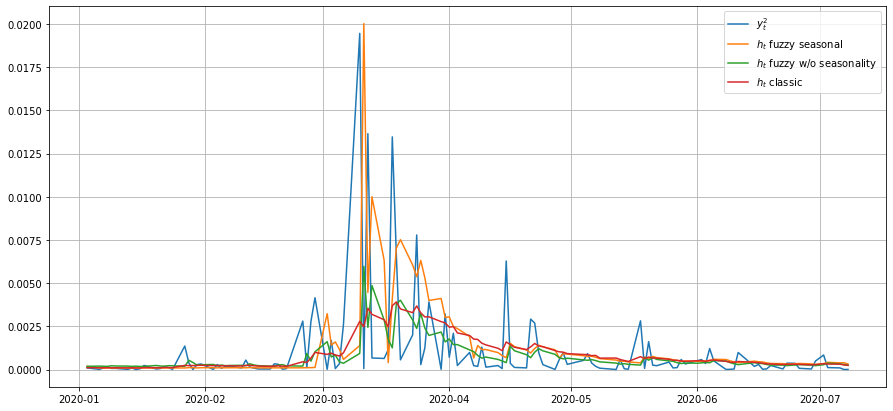

In [74]:
_slc = slice(None, 126)

plt.figure(figsize=(15, 7))
plt.plot(res_big[0]['test'].iloc[_slc] ** 2, label='$y_t^2$')
plt.plot(tested_seas.hist_output.iloc[_slc], label='$h_t$ fuzzy seasonal')
plt.plot(tested_wos.hist_output.iloc[_slc], label='$h_t$ fuzzy w/o seasonality')
plt.plot(rgf.iloc[_slc], label='$h_t$ classic')

plt.legend()
plt.grid()